The RDKit drawing code has *a lot* of options that can be changed to tune/tweak the way the drawing is done.
These options generally do have documentation in the form of doc strings, but we've never put together an overview in a central place. This blog post is an attempt to remedy that. It's inteded to be more of a reference than the kind of post that you're likely to want to read through, so there's not a huge amount of text here (but there are a bunch of examples!).

Hopefully this is useful. Now I just need to figure out how to get this information into the documentation.

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
import rdkit
print(rdkit.__version__)

2023.03.1


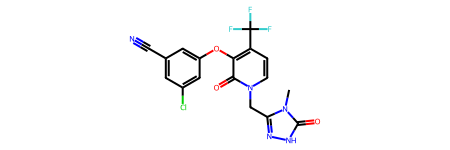

In [2]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
rdDepictor.Compute2DCoords(doravirine)
rdDepictor.StraightenDepiction(doravirine)
doravirine

In [3]:
from PIL import Image
from io import BytesIO
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res

# Colors

The drawing options expects colors to be provided as (R,G,B) 3-tuples or (R,G,B,A) 4-tuples where A is the alpha (transparency) value. Color values range from 0 to 1

## Atom palettes

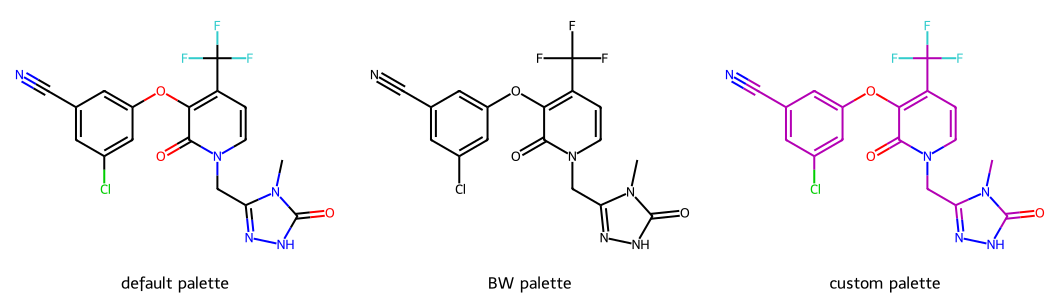

In [4]:
imgs = []
d2d = Draw.MolDraw2DCairo(350,300)
imgs.append(show_mol(d2d,doravirine,legend='default palette'))

d2d = Draw.MolDraw2DCairo(350,300)
dopts = d2d.drawOptions()
dopts.useBWAtomPalette()
imgs.append(show_mol(d2d,doravirine,legend='BW palette'))

d2d = Draw.MolDraw2DCairo(350,300)
dopts = d2d.drawOptions()
# use a custom palette where C is purple
dopts.updateAtomPalette({6:(.7,0,.7)})
imgs.append(show_mol(d2d,doravirine,legend='custom palette'))

show_images(imgs)

The other palettes available are:

- `useAvalonAtomPalette()`: the colors used by the Avalon depictor
- `useCDKAtomPalette()`: the colors used by the CDK depictor
- `setAtomPalette()`: provide a dictionary mapping atomic number to color which completely replaces the atom palette


## Background color

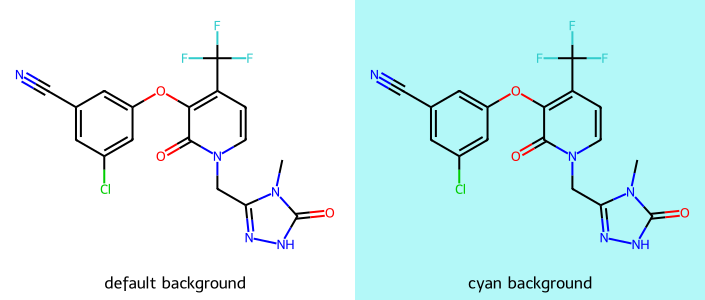

In [5]:
imgs = []
d2d = Draw.MolDraw2DCairo(350,300)
imgs.append(show_mol(d2d,doravirine,legend='default background'))

d2d = Draw.MolDraw2DCairo(350,300)
dopts = d2d.drawOptions()
dopts.setBackgroundColour((0,.9,.9,.3))
imgs.append(show_mol(d2d,doravirine,legend='cyan background'))


show_images(imgs)

## Highlight color

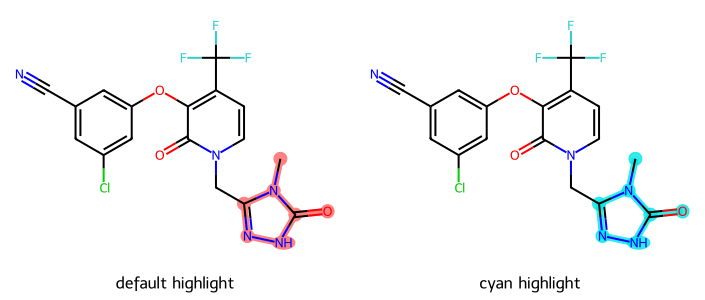

In [6]:
imgs = []
d2d = Draw.MolDraw2DCairo(350,300)
imgs.append(show_mol(d2d,doravirine,legend='default highlight', highlightAtoms=(0,1,2,3,4,5,6)))

d2d = Draw.MolDraw2DCairo(350,300)
dopts = d2d.drawOptions()
dopts.setHighlightColour((0,.9,.9,.8))
imgs.append(show_mol(d2d,doravirine,legend='cyan highlight', highlightAtoms=(0,1,2,3,4,5,6)))


show_images(imgs)

## Query bond color

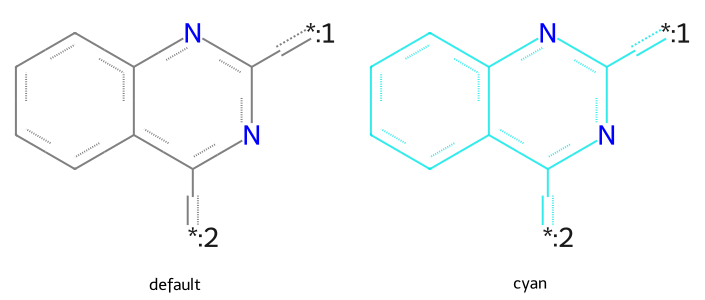

In [7]:
qm = Chem.MolFromSmarts("c1ccc2nc([*:1])nc([*:2])c2c1")
rdDepictor.Compute2DCoords(qm)
rdDepictor.StraightenDepiction(qm)

imgs = []
d2d = Draw.MolDraw2DCairo(350,300)
imgs.append(show_mol(d2d,qm,legend='default'))

d2d = Draw.MolDraw2DCairo(350,300)
dopts = d2d.drawOptions()
dopts.setQueryColour((0,.9,.9,.8))
imgs.append(show_mol(d2d,qm,legend='cyan'))

show_images(imgs)

## Other colors:

- `setSymbolColour()`: the color used for reaction arrows and single-color wedged bonds
- `setAnnotationColour()`: the color used for molecule, atom, bond, and SGroup notes



# Drawing style controls

## dummiesAreAttachments

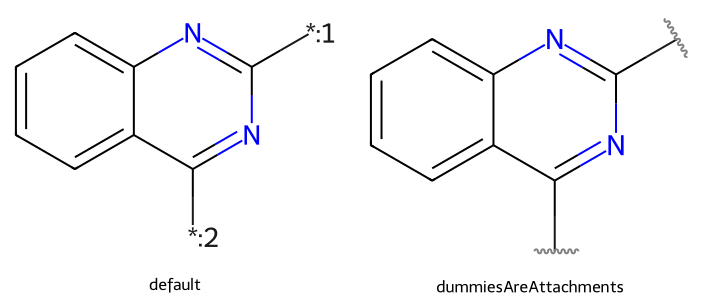

In [8]:
qm = Chem.MolFromSmiles("c1ccc2nc([*:1])nc([*:2])c2c1")
rdDepictor.Compute2DCoords(qm)
rdDepictor.StraightenDepiction(qm)

imgs = []
d2d = Draw.MolDraw2DCairo(350,300)
imgs.append(show_mol(d2d,qm,legend='default'))

d2d = Draw.MolDraw2DCairo(350,300)
dopts = d2d.drawOptions()
dopts.dummiesAreAttachments = True
imgs.append(show_mol(d2d,qm,legend='dummiesAreAttachments'))

show_images(imgs)

## Display of extra information

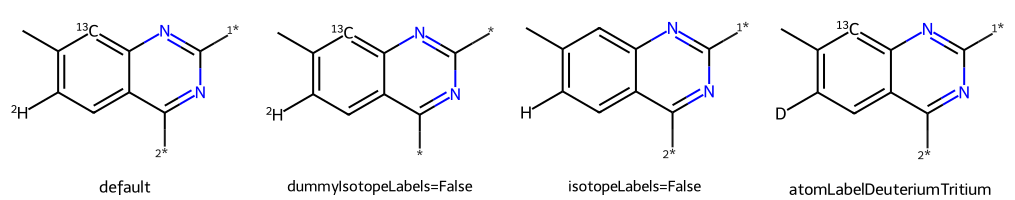

In [9]:
qm = Chem.MolFromSmiles("[2H]c1c(C)[13cH]c2nc([1*])nc([2*])c2c1")
rdDepictor.Compute2DCoords(qm)
rdDepictor.StraightenDepiction(qm)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,qm,legend='default'))


d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.dummyIsotopeLabels = False
imgs.append(show_mol(d2d,qm,legend='dummyIsotopeLabels=False'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.isotopeLabels = False
imgs.append(show_mol(d2d,qm,legend='isotopeLabels=False'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.atomLabelDeuteriumTritium = True
imgs.append(show_mol(d2d,qm,legend='atomLabelDeuteriumTritium'))


show_images(imgs)

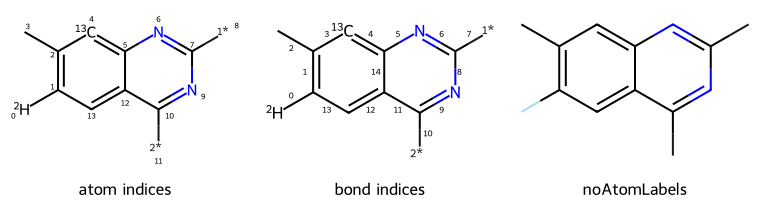

In [10]:
imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.addAtomIndices = True
imgs.append(show_mol(d2d,qm,legend='atom indices'))


d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.addBondIndices = True
imgs.append(show_mol(d2d,qm,legend='bond indices'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.noAtomLabels = True
imgs.append(show_mol(d2d,qm,legend='noAtomLabels'))



show_images(imgs)

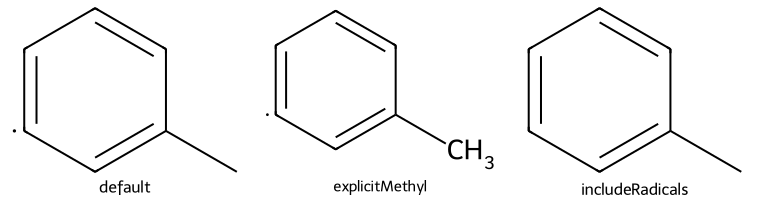

In [11]:
qm = Chem.MolFromSmiles("Cc1c[c]ccc1")
rdDepictor.Compute2DCoords(qm)
rdDepictor.StraightenDepiction(qm)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,qm,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.explicitMethyl = True
imgs.append(show_mol(d2d,qm,legend='explicitMethyl'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.includeRadicals = False
imgs.append(show_mol(d2d,qm,legend='includeRadicals'))


show_images(imgs)

Simplifying drawing of standard query atoms (Q, QH, X, XH, A, AH, M, MH) from mol files or CXSMILES is enabled by default, but it can be turned off:

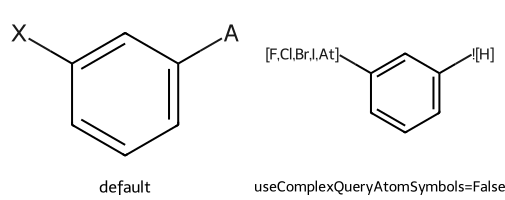

In [12]:
qm = Chem.MolFromMolBlock('''
  Mrv2305 04202308462D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -2.6667 3.8734 0 0
M  V30 2 C -4.0003 3.1034 0 0
M  V30 3 C -4.0003 1.5633 0 0
M  V30 4 C -2.6667 0.7933 0 0
M  V30 5 C -1.333 1.5633 0 0
M  V30 6 C -1.333 3.1034 0 0
M  V30 7 A 0.0007 3.8733 0 0
M  V30 8 X -5.334 3.8733 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 6 7
M  V30 8 1 2 8
M  V30 END BOND
M  V30 END CTAB
M  END
''')

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,qm,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.useComplexQueryAtomSymbols = False
imgs.append(show_mol(d2d,qm,legend='useComplexQueryAtomSymbols=False'))

show_images(imgs)

## Highlighting

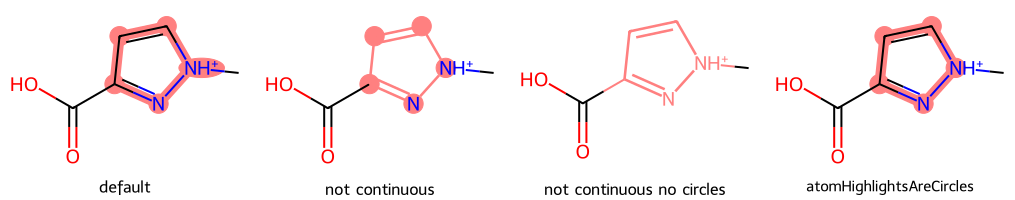

In [13]:
m = Chem.MolFromSmiles('OC(=O)c1n[nH+](C)cc1')
rdDepictor.Compute2DCoords(m)
rdDepictor.StraightenDepiction(m)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,m,legend='default',highlightAtoms=[3,4,5,7,8]))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.continuousHighlight = False
imgs.append(show_mol(d2d,m,legend='not continuous',highlightAtoms=[3,4,5,7,8]))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.continuousHighlight = False
dopts.circleAtoms = False
imgs.append(show_mol(d2d,m,legend='not continuous no circles',highlightAtoms=[3,4,5,7,8]))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.atomHighlightsAreCircles = True
imgs.append(show_mol(d2d,m,legend='atomHighlightsAreCircles',highlightAtoms=[3,4,5,7,8]))

show_images(imgs)

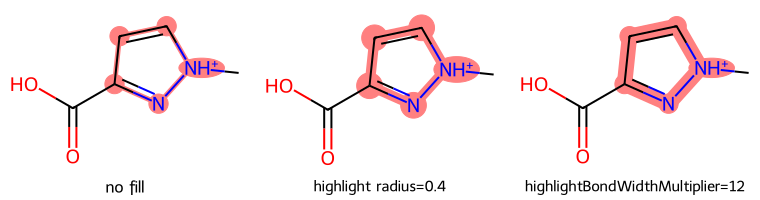

In [14]:
imgs = []

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.fillHighlights = False
imgs.append(show_mol(d2d,m,legend='no fill',highlightAtoms=[3,4,5,7,8]))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.highlightRadius = .4
imgs.append(show_mol(d2d,m,legend='highlight radius=0.4',highlightAtoms=[3,4,5,7,8]))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.highlightBondWidthMultiplier = 12
imgs.append(show_mol(d2d,m,legend='highlightBondWidthMultiplier=12',highlightAtoms=[3,4,5,7,8]))



show_images(imgs)

## Single color wedge bonds

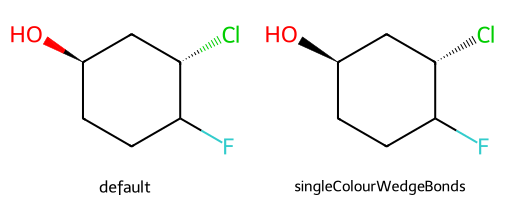

In [15]:
mol = Chem.MolFromSmiles('FC1CC[C@@H](O)C[C@@H]1Cl')
rdDepictor.Compute2DCoords(mol)
rdDepictor.StraightenDepiction(mol)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,mol,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.singleColourWedgeBonds = True
imgs.append(show_mol(d2d,mol,legend='singleColourWedgeBonds'))


show_images(imgs)

# Stereochemistry

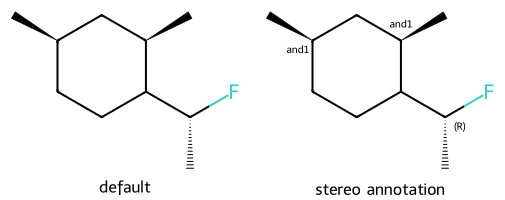

In [16]:
mol = Chem.MolFromSmiles('C[C@@H](F)C1CC[C@@H](C)C[C@H]1C |&1:6,9|')
rdDepictor.Compute2DCoords(mol)
rdDepictor.StraightenDepiction(mol)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,mol,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.addStereoAnnotation = True
imgs.append(show_mol(d2d,mol,legend='stereo annotation'))


show_images(imgs)

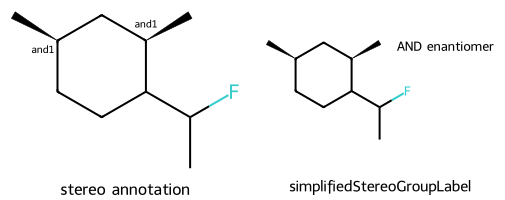

In [17]:
mol = Chem.MolFromSmiles('CC(F)C1CC[C@@H](C)C[C@H]1C |&1:6,9|')
rdDepictor.Compute2DCoords(mol)
rdDepictor.StraightenDepiction(mol)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.addStereoAnnotation = True
imgs.append(show_mol(d2d,mol,legend='stereo annotation'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.simplifiedStereoGroupLabel = True
imgs.append(show_mol(d2d,mol,legend='simplifiedStereoGroupLabel'))


show_images(imgs)

`includeChiralFlagLabel` adds an `ABS` marker to the drawing if the molecule has the chiral flag set to `1`. There's not currently an automated way to get a `REL` flag included

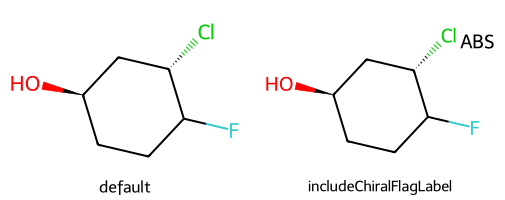

In [18]:
mol = Chem.MolFromSmiles('FC1CC[C@@H](O)C[C@@H]1Cl')
rdDepictor.Compute2DCoords(mol)
#rdDepictor.StraightenDepiction(mol) # <- at the time of writing this led to a bad drawing

mol.SetIntProp('_MolFileChiralFlag',1)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,mol,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.includeChiralFlagLabel = True
imgs.append(show_mol(d2d,mol,legend='includeChiralFlagLabel'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.includeChiralFlagLabel = True
imgs.append(show_mol(d2d,mol,legend='includeChiralFlagLabel'))



show_images(imgs)

`unspecifiedStereoIsUnknown` causes unspecified stereo atoms/bonds to be drawn as if they are unknown:

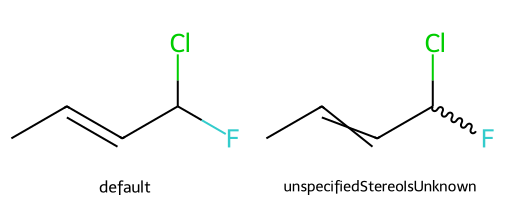

In [19]:
mol = Chem.MolFromSmiles('CC=CC(F)Cl')
rdDepictor.Compute2DCoords(mol)
rdDepictor.StraightenDepiction(mol)

imgs = []
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,mol,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.unspecifiedStereoIsUnknown = True
imgs.append(show_mol(d2d,mol,legend='unspecifiedStereoIsUnknown'))


show_images(imgs)

The RDKit, by default, picks the bonds to wedge for each molecule. If you read molecules from mol/SDF files, you can tell the drawing code to apply that wedging instead of using the RDKit defaults:

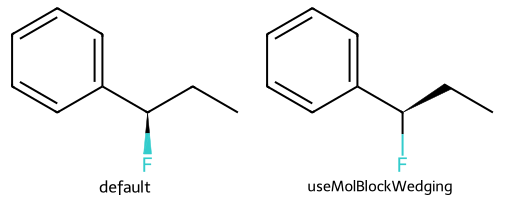

In [20]:
mol = Chem.MolFromMolBlock('''
  Mrv2211 05262308262D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 10 10 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -7.9583 6.1234 0 0
M  V30 2 C -9.292 5.3534 0 0
M  V30 3 C -9.292 3.8133 0 0
M  V30 4 C -7.9583 3.0433 0 0
M  V30 5 C -6.6247 3.8133 0 0
M  V30 6 C -6.6247 5.3534 0 0
M  V30 7 C -5.291 3.0433 0 0 CFG=1
M  V30 8 C -3.9573 3.8133 0 0
M  V30 9 F -5.291 1.5033 0 0
M  V30 10 C -2.6236 3.0433 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 3 4
M  V30 3 1 5 6
M  V30 4 1 5 7
M  V30 5 1 7 8 CFG=1
M  V30 6 1 7 9
M  V30 7 1 8 10
M  V30 8 2 2 3
M  V30 9 2 1 6
M  V30 10 2 4 5
M  V30 END BOND
M  V30 END CTAB
M  END
''')
imgs=[]
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,mol,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.useMolBlockWedging = True
imgs.append(show_mol(d2d,mol,legend='useMolBlockWedging'))


show_images(imgs)

# Variable attachment points

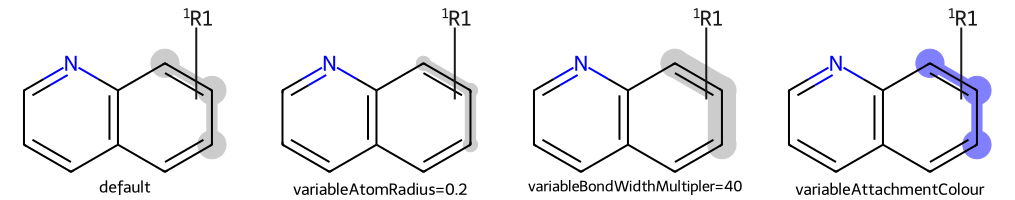

In [21]:
mol = Chem.MolFromMolBlock('''
  Mrv2211 05262309142D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 12 12 0 0 0
M  V30 BEGIN ATOM
M  V30 1 N -1.5833 4.9984 0 0
M  V30 2 C -2.917 4.2284 0 0
M  V30 3 C -2.917 2.6883 0 0
M  V30 4 C -1.5833 1.9183 0 0
M  V30 5 C -0.2497 2.6883 0 0
M  V30 6 C -0.2497 4.2284 0 0
M  V30 7 C 1.084 4.9984 0 0
M  V30 8 C 1.084 1.9183 0 0
M  V30 9 C 2.4177 2.6883 0 0
M  V30 10 C 2.4177 4.2284 0 0
M  V30 11 * 1.9731 3.9717 0 0
M  V30 12 R# 1.9731 6.2817 0 0 RGROUPS=(1 1)
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 2 1 2
M  V30 2 1 2 3
M  V30 3 2 3 4
M  V30 4 1 4 5
M  V30 5 1 5 6
M  V30 6 1 1 6
M  V30 7 1 8 9
M  V30 8 2 9 10
M  V30 9 1 7 10
M  V30 10 2 5 8
M  V30 11 2 7 6
M  V30 12 1 11 12 ENDPTS=(3 7 9 10) ATTACH=ANY
M  V30 END BOND
M  V30 END CTAB
M  END
''')
imgs=[]
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,mol,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.variableAtomRadius = 0.2
imgs.append(show_mol(d2d,mol,legend='variableAtomRadius=0.2'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.variableBondWidthMultiplier = 40
imgs.append(show_mol(d2d,mol,legend='variableBondWidthMultipler=40'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.setVariableAttachmentColour((.5,.5,1))
imgs.append(show_mol(d2d,mol,legend='variableAttachmentColour'))


show_images(imgs)

The same rules are used to draw haptic bonds, like what one finds in organometallics.

This example also shows use of the option `prepareMolsBeforeDrawing` to disable kekulization of the structures before they are rendered:

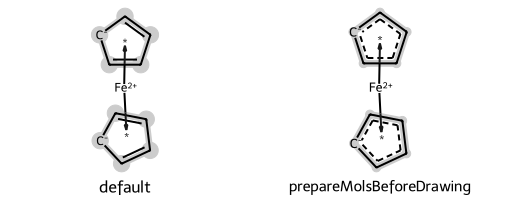

In [22]:
mol = Chem.MolFromMolBlock('''
  Mrv2211 05262309242D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 12 2 0 0
M  V30 BEGIN ATOM
M  V30 1 C -4.0833 7.3517 0 0
M  V30 2 C -5.3292 6.4464 0 0 CHG=-1
M  V30 3 C -4.8533 4.9819 0 0
M  V30 4 C -3.3133 4.9819 0 0
M  V30 5 C -2.8375 6.4464 0 0
M  V30 6 C -4.5536 2.604 0 0
M  V30 7 C -5.3002 1.257 0 0 CHG=-1
M  V30 8 C -4.25 0.1308 0 0
M  V30 9 C -2.8543 0.7816 0 0
M  V30 10 C -3.042 2.31 0 0
M  V30 11 * -4.0833 6.0417 0 0
M  V30 12 * -4 1.4167 0 0
M  V30 13 Fe -4.125 3.875 0 0 CHG=2
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 4 1 5
M  V30 2 4 4 5
M  V30 3 4 3 4
M  V30 4 4 2 3
M  V30 5 4 1 2
M  V30 6 4 6 10
M  V30 7 4 9 10
M  V30 8 4 8 9
M  V30 9 4 7 8
M  V30 10 4 6 7
M  V30 11 9 13 11 ENDPTS=(5 1 2 3 4 5) ATTACH=ALL
M  V30 12 9 13 12 ENDPTS=(5 6 7 8 9 10) ATTACH=ALL
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 DAT 0 ATOMS=(1 2) FIELDNAME=MRV_IMPLICIT_H -
M  V30 FIELDDISP="    0.0000    0.0000    DR    ALL  0       0" -
M  V30 FIELDDATA=IMPL_H1
M  V30 2 DAT 0 ATOMS=(1 7) FIELDNAME=MRV_IMPLICIT_H -
M  V30 FIELDDISP="    0.0000    0.0000    DR    ALL  0       0" -
M  V30 FIELDDATA=IMPL_H1
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
imgs=[]
d2d = Draw.MolDraw2DCairo(250,200)
imgs.append(show_mol(d2d,mol,legend='default'))

d2d = Draw.MolDraw2DCairo(250,200)
dopts = d2d.drawOptions()
dopts.prepareMolsBeforeDrawing = False
dopts.variableAtomRadius = 0.2
imgs.append(show_mol(d2d,mol,legend='prepareMolsBeforeDrawing'))


show_images(imgs)

# Fonts and text

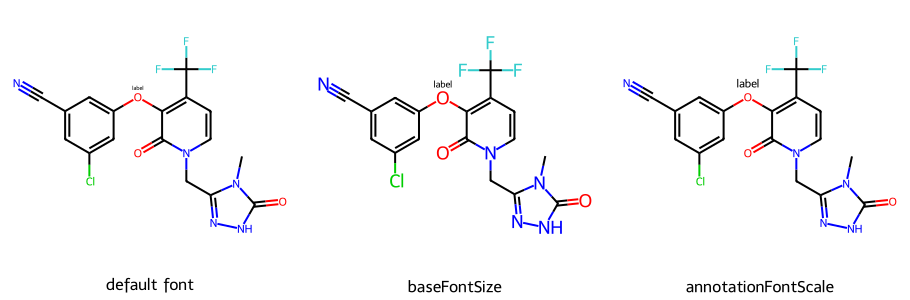

In [23]:
mol  = Chem.Mol(doravirine)
mol.GetAtomWithIdx(15).SetProp('atomNote','label')
imgs = []
d2d = Draw.MolDraw2DCairo(300,300)
imgs.append(show_mol(d2d,mol,legend='default font'))

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.baseFontSize = 1.0 # default is 0.6
imgs.append(show_mol(d2d,mol,legend='baseFontSize'))

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.annotationFontScale = 1
imgs.append(show_mol(d2d,mol,legend='annotationFontScale'))



show_images(imgs)

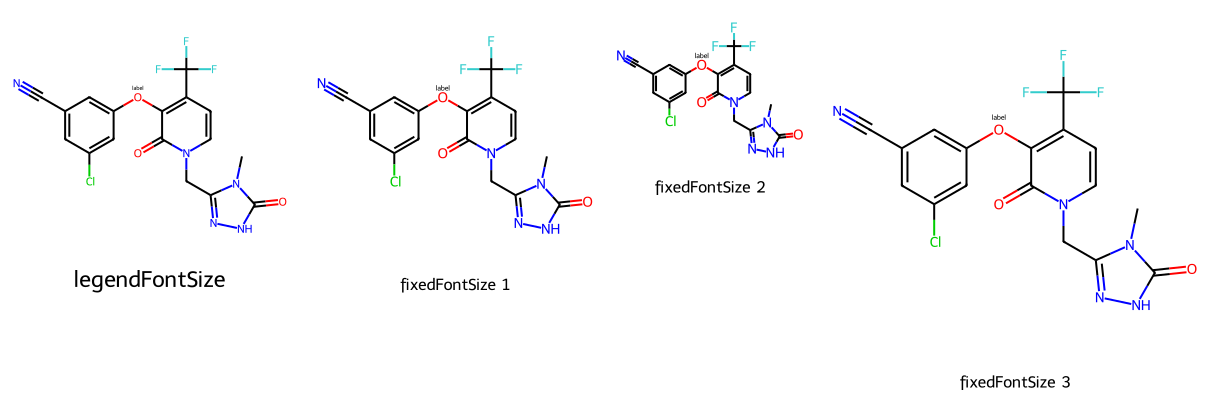

In [24]:
imgs = []

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.legendFontSize = 30
imgs.append(show_mol(d2d,mol,legend='legendFontSize'))


d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.fixedFontSize = 14
imgs.append(show_mol(d2d,mol,legend='fixedFontSize 1'))

# notice that the font size remains the same even though the image size changes
d2d = Draw.MolDraw2DCairo(200,200)
dopts = d2d.drawOptions()
dopts.fixedFontSize = 14
imgs.append(show_mol(d2d,mol,legend='fixedFontSize 2'))

d2d = Draw.MolDraw2DCairo(400,400)
dopts = d2d.drawOptions()
dopts.fixedFontSize = 14
imgs.append(show_mol(d2d,mol,legend='fixedFontSize 3'))


show_images(imgs)

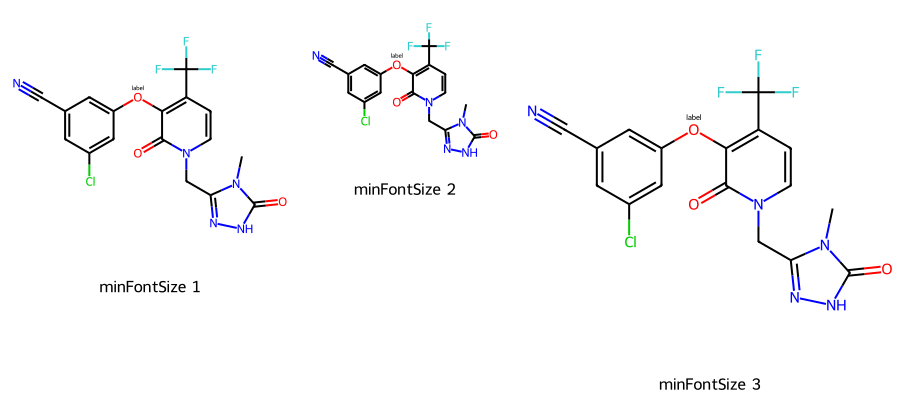

In [25]:
imgs = []

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.minFontSize = 12
imgs.append(show_mol(d2d,mol,legend='minFontSize 1'))


# here the font size doesn't change even though the image is small
d2d = Draw.MolDraw2DCairo(200,200)
dopts = d2d.drawOptions()
dopts.minFontSize = 12
imgs.append(show_mol(d2d,mol,legend='minFontSize 2'))

# this time the font gets larger since we just constrain the minimum
d2d = Draw.MolDraw2DCairo(400,400)
dopts = d2d.drawOptions()
dopts.minFontSize = 12
imgs.append(show_mol(d2d,mol,legend='minFontSize 3'))


show_images(imgs)

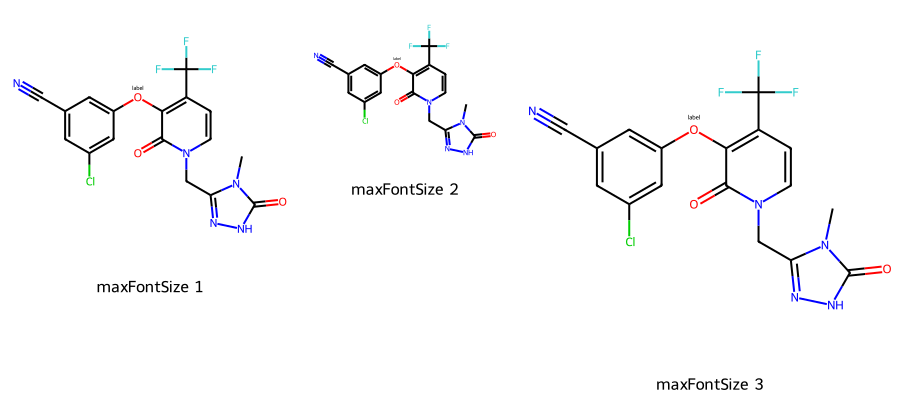

In [26]:
imgs = []

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.maxFontSize = 12
imgs.append(show_mol(d2d,mol,legend='maxFontSize 1'))


# this time the font gets smaller since we just constrain the maximum
d2d = Draw.MolDraw2DCairo(200,200)
dopts = d2d.drawOptions()
dopts.maxFontSize = 12
imgs.append(show_mol(d2d,mol,legend='maxFontSize 2'))

# here the font size doesn't change even though the image is small
d2d = Draw.MolDraw2DCairo(400,400)
dopts = d2d.drawOptions()
dopts.maxFontSize = 12
imgs.append(show_mol(d2d,mol,legend='maxFontSize 3'))


show_images(imgs)

You can also change the font itself. The RDKit uses truetype fonts:

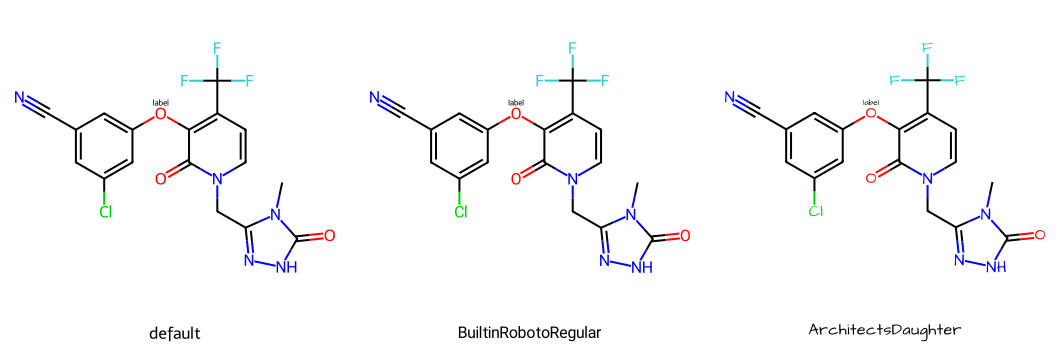

In [27]:
imgs = []

# the default font is Telex Regular:
# https://fonts.google.com/specimen/Telex
d2d = Draw.MolDraw2DCairo(350,350)
dopts = d2d.drawOptions()
dopts.fixedFontSize = 16
imgs.append(show_mol(d2d,mol,legend='default'))

# the RDKit also includes Roboto regular:
# https://fonts.google.com/specimen/Roboto
d2d = Draw.MolDraw2DCairo(350,350)
dopts = d2d.drawOptions()
dopts.fixedFontSize = 16
dopts.fontFile = "BuiltinRobotoRegular"
imgs.append(show_mol(d2d,mol,legend='BuiltinRobotoRegular'))

# use a truetype text file downloaded from here: 
# https://fonts.google.com/specimen/Architects+Daughter
d2d = Draw.MolDraw2DCairo(350,350)
dopts = d2d.drawOptions()
dopts.fixedFontSize = 16
dopts.fontFile = "/tmp/ArchitectsDaughter-Regular.ttf"
imgs.append(show_mol(d2d,mol,legend='ArchitectsDaughter'))

show_images(imgs)

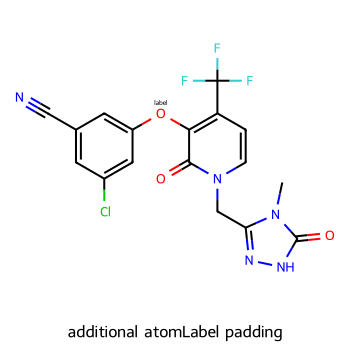

In [28]:
imgs = []

d2d = Draw.MolDraw2DCairo(350,350)
dopts = d2d.drawOptions()
dopts.additionalAtomLabelPadding = 0.2 # fraction of font size
imgs.append(show_mol(d2d,mol,legend='additional atomLabel padding'))
show_images(imgs)

# Bond drawing parameters


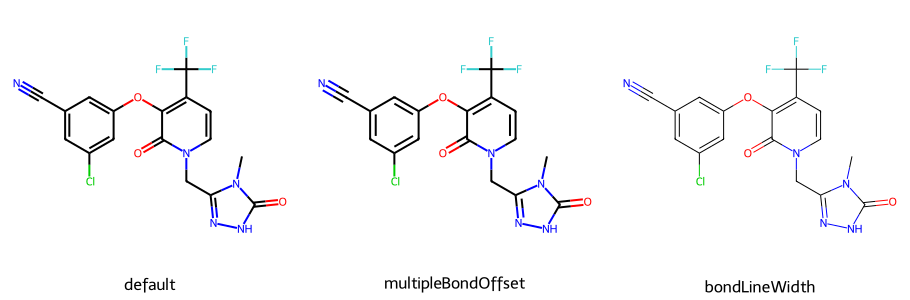

In [29]:
d2d = Draw.MolDraw2DCairo(300,300)

imgs = []
dopts = d2d.drawOptions()
dopts.maxFontSize = 12
imgs.append(show_mol(d2d,doravirine,legend='default'))

# the multipleBondOffset is a multiple of the single bond length
# default is 0.15
d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.multipleBondOffset = 0.2
imgs.append(show_mol(d2d,doravirine,legend='multipleBondOffset'))

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.bondLineWidth = 1.0 # default is 2.0
imgs.append(show_mol(d2d,doravirine,legend='bondLineWidth'))



show_images(imgs)

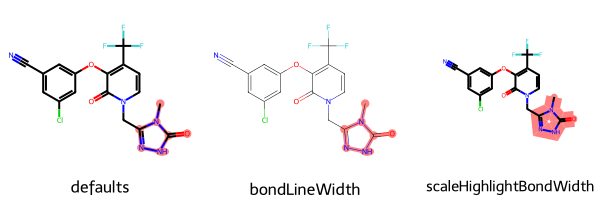

In [30]:
imgs = []

d2d = Draw.MolDraw2DCairo(200,200)
imgs.append(show_mol(d2d,doravirine,legend='defaults', highlightAtoms=(0,1,2,3,4,5,6)))

d2d = Draw.MolDraw2DCairo(200,200)
dopts = d2d.drawOptions()
dopts.scaleBondWidth = True
imgs.append(show_mol(d2d,doravirine,legend='bondLineWidth', highlightAtoms=(0,1,2,3,4,5,6)))

d2d = Draw.MolDraw2DCairo(200,200)
dopts = d2d.drawOptions()
dopts.scaleHighlightBondWidth = False
imgs.append(show_mol(d2d,doravirine,legend='scaleHighlightBondWidth', highlightAtoms=(0,1,2,3,4,5,6)))


show_images(imgs)

# Miscellaneous

The rotate option lets you apply an arbitrary rotation to the molecule before it is rendered. The padding option specifies the faction of the drawing canvas that should be reserved around the molecule as padding

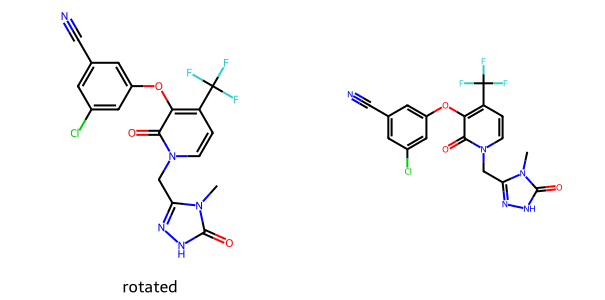

In [31]:
imgs = []

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.rotate = 30 # rotation angle in degrees
imgs.append(show_mol(d2d,doravirine,legend='rotated'))

d2d = Draw.MolDraw2DCairo(300,300)
dopts = d2d.drawOptions()
dopts.padding = 0.2 # default is 0.05
imgs.append(show_mol(d2d,doravirine,legend='padding')) # there's a bug as of this writing so that the label doesn't show


show_images(imgs)

By default when different sized molecules are drawn at the same time they all have the same bond scaling of the largest molecule. This can be toggled off:

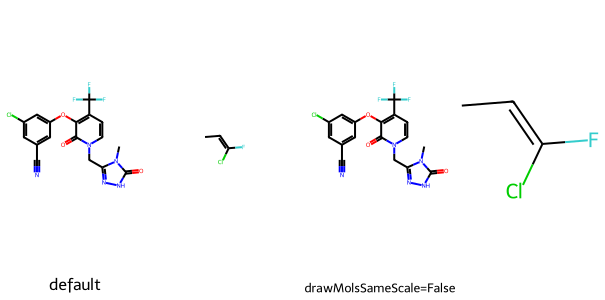

In [32]:
mol = Chem.MolFromSmiles(f'{Chem.MolToSmiles(doravirine)}.CC=C(F)Cl')
rdDepictor.Compute2DCoords(mol)
rdDepictor.StraightenDepiction(mol)
mols = Chem.GetMolFrags(mol,asMols=True)
        
imgs = []

d2d = Draw.MolDraw2DCairo(300,300,150,300)
d2d.DrawMolecules(mols,legends=('default',''))
d2d.FinishDrawing()
bio = BytesIO(d2d.GetDrawingText())
imgs.append(Image.open(bio))

d2d = Draw.MolDraw2DCairo(300,300,150,300)
dopts = d2d.drawOptions()
dopts.drawMolsSameScale = False
d2d.DrawMolecules(mols,legends=('drawMolsSameScale=False',''))
d2d.FinishDrawing()
bio = BytesIO(d2d.GetDrawingText())
imgs.append(Image.open(bio))


show_images(imgs)

# "flexicanvas" mode

Thus far we've always been providing the canvas size. Sometimes it's nicer to set a target bond length and let the drawing code figure out how big the canvas needs to be. You do this by setting the canvas size to (-1,-1)

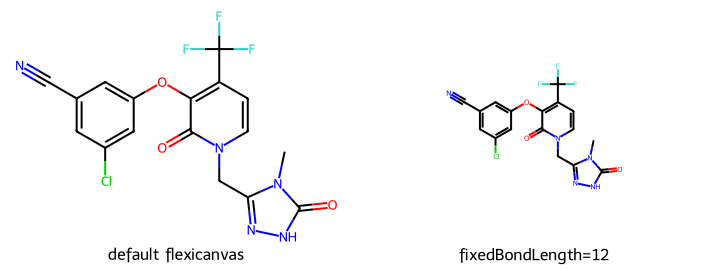

In [33]:
imgs = []
d2d = Draw.MolDraw2DCairo(-1,-1) # use a flexicanvas: no pre-specified drawing size
imgs.append(show_mol(d2d,doravirine,legend="default flexicanvas"))

d2d = Draw.MolDraw2DCairo(-1,-1) # use a flexicanvas: no pre-specified drawing size
dopts = d2d.drawOptions()
dopts.fixedBondLength = 12
imgs.append(show_mol(d2d,doravirine,legend="fixedBondLength=12"))

show_images(imgs)

# ACS1996 mode

This is a mode which is designed to produce images compatible with the drawing standards for American Chemical Society (ACS) journals.

There are two ways to do this. In the first you set the drawing options on a MolDraw2D object by passing the mean bond length for the molecule to be drawn:

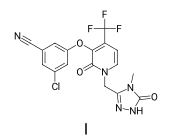

In [34]:
d2d = Draw.MolDraw2DCairo(-1,-1) # use a flexicanvas: no pre-specified drawing size
Draw.SetACS1996Mode(d2d.drawOptions(),Draw.MeanBondLength(doravirine))
show_mol(d2d,doravirine,legend='I')


And in the second, you just pass the drawing object and the molecule:

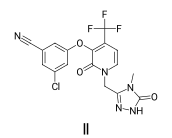

In [35]:
d2d = Draw.MolDraw2DCairo(-1,-1)
Draw.DrawMoleculeACS1996(d2d,doravirine,legend="II")
bio = BytesIO(d2d.GetDrawingText())
Image.open(bio)
